In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import minimize
from scipy.stats import rv_discrete
import functools


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
x = np.array(range(500))
y = 0.5 * x + 1 + np.random.normal(scale = 0.2, size=500)

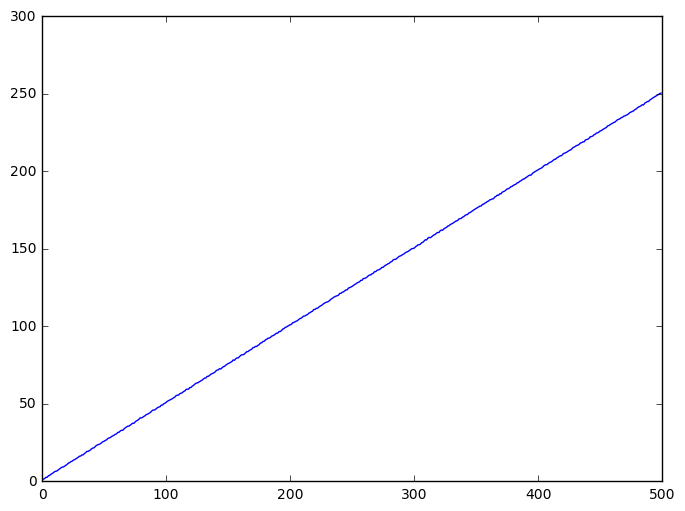

In [3]:
plt.figure(figsize=(8, 6))
plt.plot(x, y)

In [4]:
def mse(x, y, params):
    return np.sum((y - (params[0] * x + params[1])) ** 2)
mse500 = lambda p: mse(x, y, p)
res = minimize(mse500, [0.5, 2])
res

      fun: 19.376154552924888
 hess_inv: array([[  4.80001923e-08,  -1.19760480e-05],
       [ -1.19760480e-05,   3.98802398e-03]])
      jac: array([ 0.01270866, -0.00183964])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 227
      nit: 2
     njev: 54
   status: 2
  success: False
        x: array([ 0.50004208,  0.99409908])

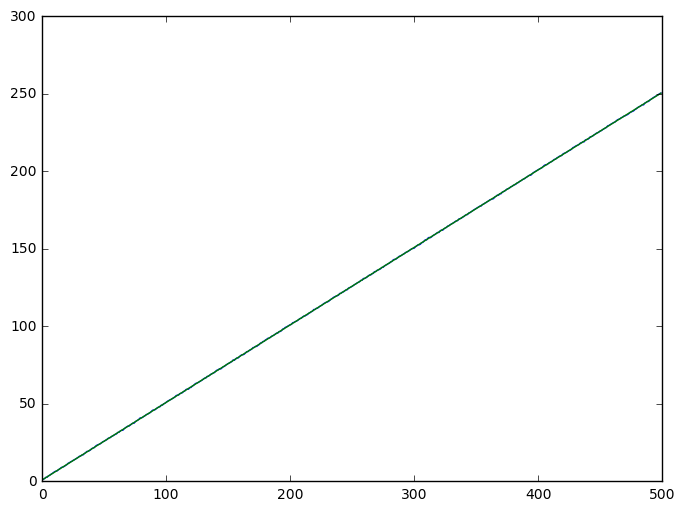

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.plot(x, res.x[0] * x + res.x[1], color='green')

In [6]:

x_new = np.append(x, rv_discrete(values=(range(500), [1./500] * 500)).rvs(size=75))
y_new = np.append(y, -1 + np.random.normal(scale = 0.2, size=75))
print len(x_new), len(y_new)

575 575


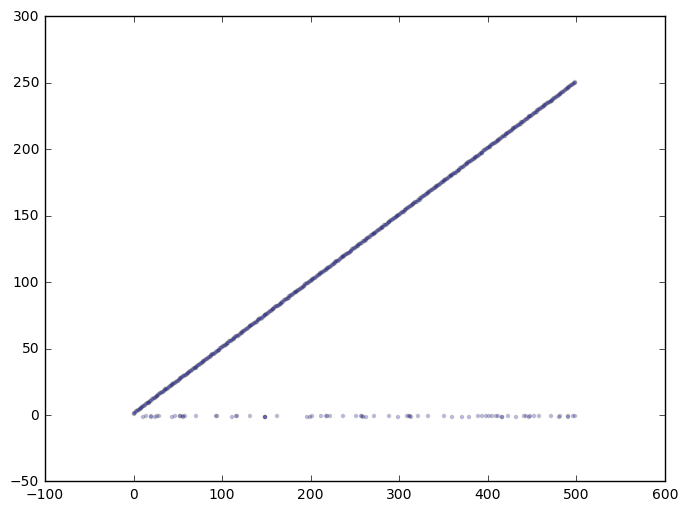

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(x_new, y_new, alpha=0.2, s=5)

In [8]:
# не заюзал sklearn sorry, ниже заюзаю для MAE
def mse(x, y, params):
    return np.sum((y - (params[0] * x + params[1])) ** 2)
mse575 = lambda p: mse(x_new, y_new, p)
res = minimize(mse575, [0.5, 2])
res

      fun: 1525463.0340008405
 hess_inv: array([[  1.13154721e-08,  -2.84169313e-06],
       [ -2.84169313e-06,   1.58320764e-03]])
      jac: array([-0.265625,  0.      ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 124
      nit: 3
     njev: 28
   status: 2
  success: False
        x: array([ 0.4166668 ,  4.58126821])

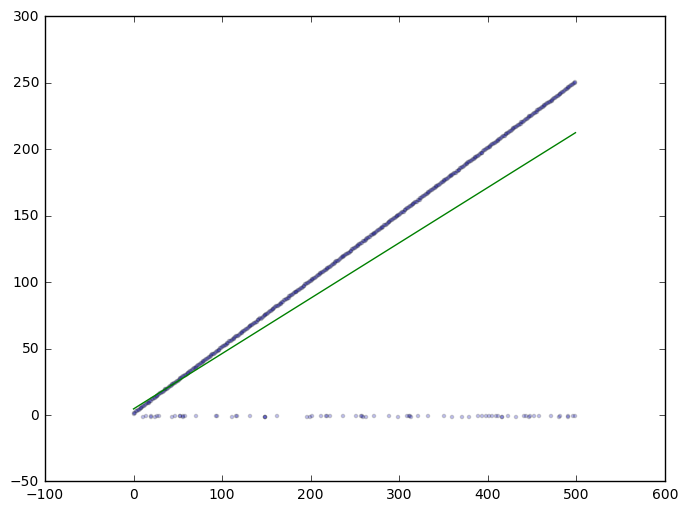

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(x_new, y_new, s=5, alpha=0.2)
plt.plot(x, res.x[0] * x + res.x[1], color='green')

In [10]:
from sklearn.metrics import mean_absolute_error
# а тут заюзаю
mae575 = lambda p: mean_absolute_error(y_new, x_new * p[0] + p[1])
res = minimize(mae575, [0.5, 2])
res

      fun: 17.486502565284614
 hess_inv: array([[  7.90574109e-06,  -9.95214067e-04],
       [ -9.95214067e-04,   1.39909861e-01]])
      jac: array([-0.06944513, -0.00173926])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 464
      nit: 13
     njev: 113
   status: 2
  success: False
        x: array([ 0.50010897,  0.95116935])

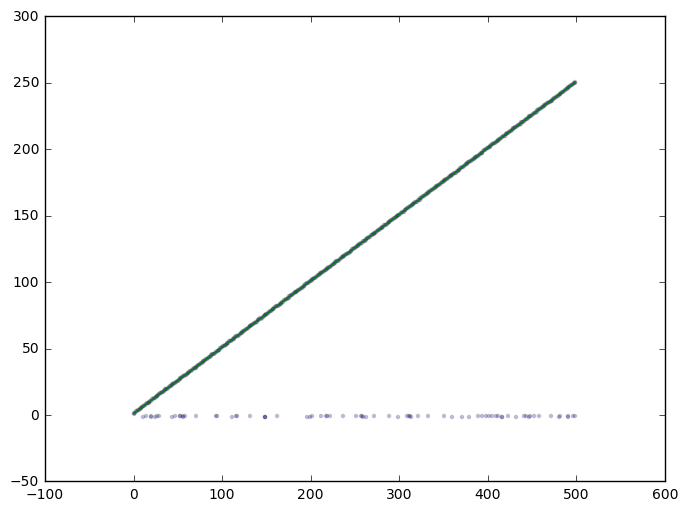

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(x_new, y_new, s=5, alpha=0.2)
plt.plot(x, res.x[0] * x + res.x[1], color='green')

MAE меньше штрафует за выбросы, поэтому модели на основе MAE будут более устойчивы к выбросам.